In [1]:
from collections import defaultdict 
class Confusion_Matrix:
    def init (self): 
        self.Col_Name=[]

        self.Matrix = {"Actual":["R","Y","B","B","Y","R","Y","G","G","B","R","Y","Y","Y" ,"G"],
                       "Predicted":["R","G","B","R","Y","R","Y","Y","R","B","R","Y","R"," B","G"]}
        self.Class_Count=defaultdict(lambda:defaultdict(list)) 
        self.record_0 = defaultdict(lambda: defaultdict(list)) 
        self.Creating_Col_Name()
    def Creating_Col_Name(self):
        for actual in self.Matrix["Actual"]:
            for predicted in self.Matrix["Predicted"]:
                if self.Col_Name. contains ("T("+actual + "->" + predicted+")") or self.Col_Name. contains ("F("+actual + "->" + predicted+")"):pass 
                else: 
                    if actual == predicted:
                        self.Col_Name.append('T('+actual + '->' + predicted+')')
                    else:
                        self.Col_Name.append('F('+actual + '->' + predicted+')')

        for Col_N in self.Col_Name: 
            self.Matrix[Col_N] = []
        return
    def Calculating_Table(self): 
        count = 0
        while count<len(self.Matrix['Actual']):
            Actual_class_name = self.Matrix['Actual'][count] 
            Predicted_class_name = self.Matrix['Predicted'][count] 
            if Actual_class_name == Predicted_class_name:
                for check in self.Col_Name:
                    if Actual_class_name[0]==check[2] and Predicted_class_name[0]==check[5]:
                        self.Matrix[check].append(1)
                    else:
                        self.Matrix[check].append(0)
            else:
                    for check in self.Col_Name:
                        if Actual_class_name[0]==check[2] and Predicted_class_name[0]==check[5]:
                            self.Matrix[check].append(1) 
                        else:

                            self.Matrix[check].append(0) 
                            count = count+1
            print("\n")
        for c in self.Col_Name:
            print(c,"\t",self.Matrix[c]) 
        return
def Class_instance_count_sub_0(self,name):
        for value in self.Matrix[name]:
            V = self.Class_Count[name][value] 
            if V != []:
                self.Class_Count[name][value] = V + 1 
            else:
                self.Class_Count[name][value] = 1
            for value in self.Matrix[name]:
                if self.Class_Count[name].__contains (1):
                    pass 
                else:
                    self.Class_Count[name][1] =0
def CountFrequency(self,name): 
        count = {}

        for i in self.Matrix[name]:
            count[i] = count.get(i, 0) + 1
        return count
def precision(self,Main_class):
        TP = 0.0
        FP = 0.0 
        print("Prediction -->") 
        for main in Main_class:
        #Calculting True and False positive for c in self.Class_Count:
            if c[0] == "T" and main == c[2] and main == c[5]: 
                TP = self.Class_Count[c][1]
            if c[0] == "F" and main != c[2] and main == c[5]: 
                FP +=self.Class_Count[c][1]
            Precision = round((TP/(TP+FP)),5)
            print("Precision :",main)
            print(main," = ",TP,"/(",TP,"+",FP,") = ",Precision," = ",Precision*100)
            self.record_0["Precision"][main]=[Precision] 
            FP = TP = 0.0

def Recall(self,Main_class): 
        TP = 0.0
        FN = 0.0
        for main in Main_class:
    #Calculting True and False positive for c in self.Class_Count:
            if c[0] == "T" and main == c[2] and main == c[5]: 
                TP = self.Class_Count[c][1]
            if c[0] == "F" and main == c[2] and main != c[5]: 
                FN +=self.Class_Count[c][1]
                recall = round((TP/(TP+FN)),5)
                print("Recall :",main)
                print(main," = ",TP,"/(",TP,"+",FN,") = ",recall," = ",recall*100) 
        self.record_0["Recall"][main] = [recall]
        FN = TP = 0.0
def Class_instance_count(self): 
        self.Calculating_Table()
        count = 0
        while count<len(self.Col_Name):

            self.Class_instance_count_sub_0(self.Col_Name[count])
            count = count+1
            print("\n")
            print("Total Availble of One's in TP , TN ,FN, FP columns.") 
            for classes in self.Class_Count:
                print(classes," = ",self.Class_Count[classes][1]) 
                print("\n")
                print("Actual Data")
            tem_dict={} 
            tem_dict.update(self.CountFrequency("Actual")) 
            for Clas , value in tem_dict.items():
                print(Clas,"\t",value)
                print("\n")
                print("Predicted Data")
        tem_dict = {} 
        tem_dict.update(self.CountFrequency("Predicted"))
        for Clas, value in tem_dict.items(): 
            print(Clas, "\t", value)
            print("\n") 
            self.precision(tem_dict) 
            self.Recall(tem_dict)

        return
        obj = Confusion_Matrix() 
        obj.Class_instance_count()

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("Gender_Height_Weight.csv")

In [4]:
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [5]:
X=df[["Height"]]
y_true=df[['Weight']]

In [6]:
def line(x,w=0,b=0):
    return w*x+b
def mean_square_error(y_true,y_pred):
    s=(y_true-y_pred)**2
    return np.sqrt(s.mean())

    

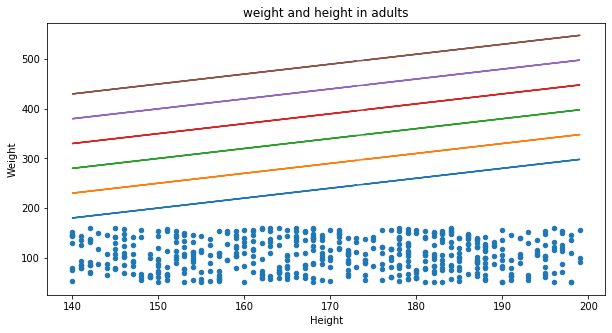

In [17]:
plt.figure(figsize=(10,5))
ax1=plt.subplot(111.9)
df.plot(kind="scatter",
               x='Height',
               y='Weight',
               title='weight and height in adults',ax=ax1)
bs=np.array([-100,-50,0,50,100,150])
mses=[]
for b in bs:
    y_pred=line(X,w=2,b=b)
    mse=mean_square_error(y_true,y_pred)
    mses.append(mse)
    plt.plot(X,y_pred)


Text(0.5, 0, 'b')

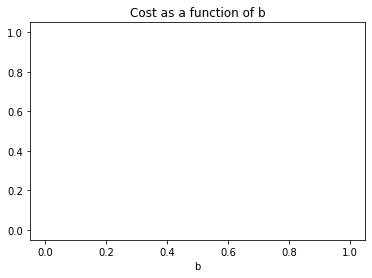

In [18]:
ax2=plt.subplot(110.1)
plt.plot(bs,mses)
plt.title("Cost as a function of b")
plt.xlabel("b")


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

df=pd.read_csv("Gender_Height_Weight.csv")
X=df[["Height"]]
y_true=df[['Weight']]
X.shape


(500, 1)

In [20]:
model=Sequential()
model.add(Dense(1,input_shape=(1,)))

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(Adam(lr=0.8),'mean_squared_error')
model.fit(X,y_true,epochs=30)

Epoch 1/30
16/16 [==============================] - 0s 812us/step - loss: 10535.6504
Epoch 2/30
16/16 [==============================] - 0s 874us/step - loss: 2840.1045
Epoch 3/30
16/16 [==============================] - 0s 812us/step - loss: 1897.3086
Epoch 4/30
16/16 [==============================] - 0s 874us/step - loss: 1234.2729
Epoch 5/30
16/16 [==============================] - 0s 812us/step - loss: 1189.7378
Epoch 6/30
16/16 [==============================] - 0s 999us/step - loss: 1265.5388
Epoch 7/30
16/16 [==============================] - 0s 1ms/step - loss: 1288.2108
Epoch 8/30
16/16 [==============================] - 0s 1ms/step - loss: 1213.5852
Epoch 9/30
16/16 [==============================] - 0s 1ms/step - loss: 1332.7988
Epoch 10/30
16/16 [==============================] - 0s 1ms/step - loss: 1386.1578
Epoch 11/30
16/16 [==============================] - 0s 1ms/step - loss: 1201.6649
Epoch 12/30
16/16 [==============================] - 0s 1ms/step - loss: 1307.4426


In [23]:
y_pred=model.predict(X)

In [24]:
y_pred

array([[102.37694 ],
       [110.11428 ],
       [108.05099 ],
       [113.20921 ],
       [ 89.48137 ],
       [110.11428 ],
       [ 88.44972 ],
       [ 92.060486],
       [102.37694 ],
       [ 99.79782 ],
       [113.20921 ],
       [ 94.639595],
       [111.66175 ],
       [ 92.57631 ],
       [111.14593 ],
       [ 91.54466 ],
       [ 93.607956],
       [ 84.83897 ],
       [ 86.90226 ],
       [101.34529 ],
       [ 93.607956],
       [ 91.54466 ],
       [ 99.79782 ],
       [108.05099 ],
       [101.34529 ],
       [ 90.513016],
       [110.630104],
       [109.082634],
       [ 96.70289 ],
       [104.956055],
       [ 91.54466 ],
       [104.44023 ],
       [113.20921 ],
       [ 95.15542 ],
       [ 93.607956],
       [110.11428 ],
       [114.24086 ],
       [ 86.90226 ],
       [100.82947 ],
       [108.05099 ],
       [102.89276 ],
       [ 89.48137 ],
       [ 93.607956],
       [ 95.67124 ],
       [106.50352 ],
       [108.05099 ],
       [109.59846 ],
       [105.9

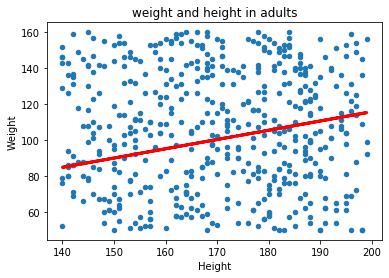

In [25]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='weight and height in adults')
plt.plot(X,y_pred,color='red',linewidth=3)

In [26]:
w,b=model.get_weights()

In [27]:
w

array([[0.5158227]], dtype=float32)

In [28]:
b

array([12.623789], dtype=float32)

In [35]:
model.predict([195]) #predicting weight by height

array([[113.20921]], dtype=float32)

In [29]:
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [40]:
X=model.predict(y_pred) #predicting height by weight

In [41]:
X

array([[65.43214 ],
       [69.42323 ],
       [68.35894 ],
       [71.01967 ],
       [58.78031 ],
       [69.42323 ],
       [58.24816 ],
       [60.11068 ],
       [65.43214 ],
       [64.10177 ],
       [71.01967 ],
       [61.44104 ],
       [70.22146 ],
       [60.376755],
       [69.95538 ],
       [59.844604],
       [60.908897],
       [56.38565 ],
       [57.44995 ],
       [64.899994],
       [60.908897],
       [59.844604],
       [64.10177 ],
       [68.35894 ],
       [64.899994],
       [59.312454],
       [69.68931 ],
       [68.89109 ],
       [62.505333],
       [66.762505],
       [59.844604],
       [66.49643 ],
       [71.01967 ],
       [61.707115],
       [60.908897],
       [69.42323 ],
       [71.55182 ],
       [57.44995 ],
       [64.63392 ],
       [68.35894 ],
       [65.69821 ],
       [58.78031 ],
       [60.908897],
       [61.97319 ],
       [67.56072 ],
       [68.35894 ],
       [69.157166],
       [67.29465 ],
       [61.97319 ],
       [56.38565 ],


In [42]:
w,b=model.get_weights()

In [43]:
w

array([[0.5158227]], dtype=float32)

In [44]:

b

array([12.623789], dtype=float32)

In [45]:
model.predict([110])

array([[69.36429]], dtype=float32)